In [3]:
%reset -f

import pandas as pd
import os
import re
import numpy as np
from six.moves import xrange
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [4]:
def ability_level_mapper(data, groups=None, col='front', how='naive', n_level=20):
    # the raw data is divided into groups according to its exc_num, ability levels are calculated respectively
    # how: 1 is mapping without any other processing, called 'naive'
    origin = data.copy()
    if groups == None:
        v_max = origin[col].max()
        v_min = origin[col].min()
        
        interval = (v_max- v_min)/n_level
        assert interval!=0, 'zero dividend'
        origin[col] = (origin[col]-v_min)/interval
        
        origin[col] = origin[col].astype(int)
        origin[col] = n_level-origin[col]
        return origin
    
    if how == 1 or how=='naive':
        for index, group in groups:
            
            v_max = group[col].max()
            v_min = group[col].min()
            
            interval = (v_max-v_min)/n_level
            
            assert interval!=0, 'zero dividend'
            
            origin.loc[index, col] = (origin.loc[index, col]-v_min)/interval
        origin[col] = origin[col].astype(int)
        origin[col] = n_level-origin[col]
        return origin
        
        

In [5]:
all_data = pd.read_csv('../data/reduced_header_data.csv')
all_data = all_data[['day', 'exc_num', 'exc_times', 'front', 'uid']]
# all_data = all_data.groupby(['day', 'exc_num', 'exc_times', 'uid']).mean()
all_data = all_data[all_data['exc_num']!=1.1]
all_data = all_data[all_data['front']<1]
all_data = all_data.groupby(['day', 'exc_num', 'exc_times', 'uid']).mean().reset_index()
all_data.head()

,day,exc_num,exc_times,uid,front
0,1,1.2,1,1,0.087284
1,1,1.2,1,2,0.128286
2,1,1.2,1,4,0.142868
3,1,1.2,1,5,0.133325
4,1,1.2,1,6,0.160666


In [6]:
all_data.describe()

,day,exc_num,exc_times,uid,front
count,698.000000,698.000000,698.000000,698.000000,698.000000
mean,2.997135,2.634527,2.583095,5.723496,0.188979
std,1.438353,1.084796,1.556990,3.230867,0.135154
min,1.000000,1.200000,1.000000,1.000000,0.015225
25%,2.000000,1.500000,1.000000,3.000000,0.088436
50%,3.000000,2.300000,2.000000,6.000000,0.139041
75%,4.000000,4.100000,4.000000,8.000000,0.272219
max,5.000000,4.300000,9.000000,11.000000,0.644121


### all items

In [7]:
# items = ability_level_mapper(all_data)
# len(items)
items = all_data

In [8]:
items.describe()

,day,exc_num,exc_times,uid,front
count,698.000000,698.000000,698.000000,698.000000,698.000000
mean,2.997135,2.634527,2.583095,5.723496,0.188979
std,1.438353,1.084796,1.556990,3.230867,0.135154
min,1.000000,1.200000,1.000000,1.000000,0.015225
25%,2.000000,1.500000,1.000000,3.000000,0.088436
50%,3.000000,2.300000,2.000000,6.000000,0.139041
75%,4.000000,4.100000,4.000000,8.000000,0.272219
max,5.000000,4.300000,9.000000,11.000000,0.644121


## 1. item specific parameters estimation

In [7]:
uid_avg_score_per_item = items.reset_index()[['day', 'exc_num', 'uid', 'front']].groupby(by=['day', 'exc_num', 'uid']).mean()
uid_avg_score_per_item.head()

front
day exc_num uid          
1   1.2     1    0.106927
            2    0.113373
            3    0.120050
            4    0.150457
            5    0.132366

In [8]:
all_data[(all_data['uid']==7) & (all_data['exc_num']==2.3)]

,day,exc_num,exc_times,uid,front
267,2,2.3,1,7,0.252585
292,2,2.3,4,7,0.261909
619,5,2.3,1,7,0.392983


#### unidemention testing 

In [2]:
# check pearson coefficient between different items

tmp = uid_avg_score_per_item.reset_index()
# groups = tmp[(tmp['day']==1) & (tmp['exc_num']!=1.1)].groupby(by=['exc_num'])
groups = tmp[(tmp['day']==2) & (tmp['exc_num']>2)].groupby(by=['exc_num'])
# groups = tmp[(tmp['day']==3) & (tmp['exc_num']>3)].groupby(by=['exc_num'])
# groups = tmp[(tmp['day']==4) & (tmp['exc_num']>4)].groupby(by=['exc_num'])
# groups = tmp[(tmp['day']==5) ].groupby(by=['exc_num'])
for index1, group1 in groups:
    set1 = group1['uid'].tolist()

    for index2, group2 in groups:
        if index1==index2:
            continue
        else:
            set2 = group2['uid'].tolist()
            common_uid = list(set(set1).intersection(set2))
            l1 = group1.set_index(['uid']).loc[common_uid, 'front']
            l2 = group2.set_index(['uid']).loc[common_uid, 'front']
            print(group1.set_index(['uid']).loc[common_uid])
            print(group2.set_index(['uid']).loc[common_uid])
            pearson, p_vlaue = pearsonr(l1, l2)
            print(pearson)

NameError: name 'uid_avg_score_per_item' is not defined

In [1]:
groups = tmp[(tmp['day']==1) & (tmp['exc_num']!=1.1)].groupby(by=['exc_num'])
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))
for index, group in groups:
#     print(group)
    
    ax = sns.lineplot(x='uid', y="front", data=group.reset_index(drop=False))
#     ax.set_title('exc_num is'+str(index))

NameError: name 'tmp' is not defined

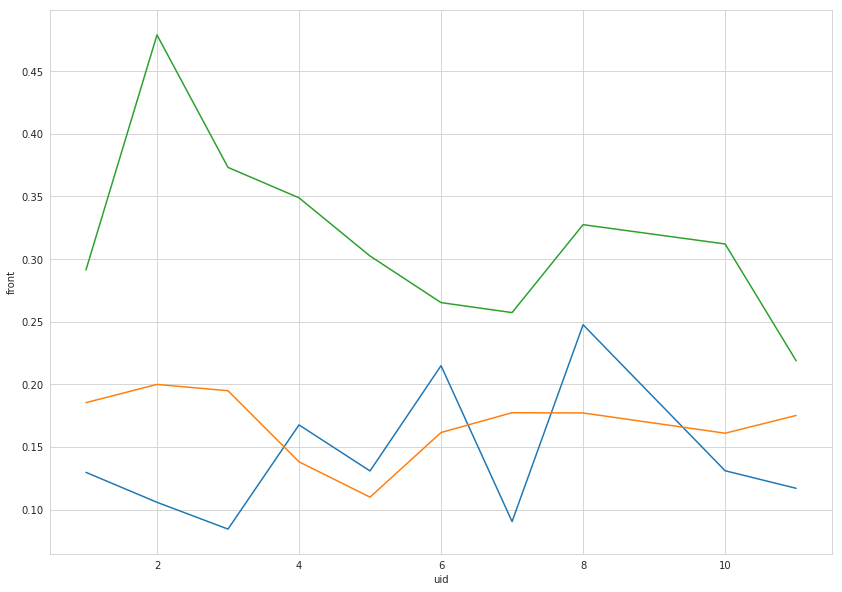

In [11]:
groups = tmp[(tmp['day']==2) & (tmp['exc_num']>2)].groupby(by=['exc_num'])
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))
for index, group in groups:
#     print(group)
    
    ax = sns.lineplot(x='uid', y="front", data=group.reset_index(drop=False))
#     ax.set_title('exc_num is'+str(index))

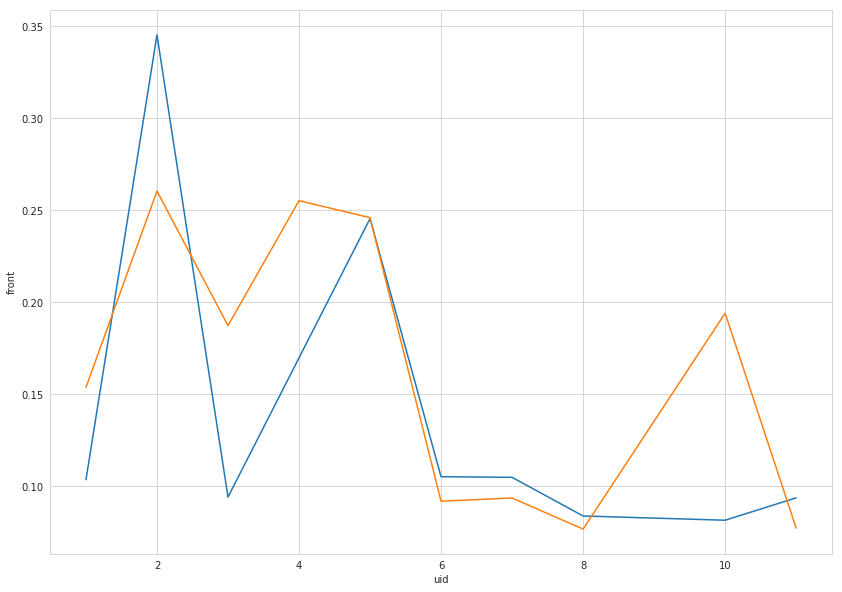

In [12]:
groups = tmp[(tmp['day']==3) & (tmp['exc_num']>3)].groupby(by=['exc_num'])
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))
for index, group in groups:
#     print(group)
    
    ax = sns.lineplot(x='uid', y="front", data=group.reset_index(drop=False))
#     ax.set_title('exc_num is'+str(index))

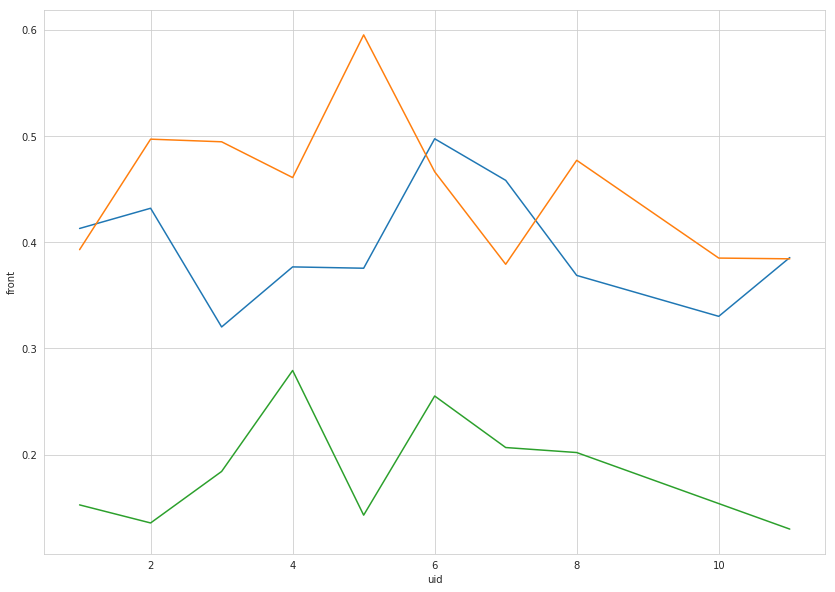

In [13]:
groups = tmp[(tmp['day']==4) & (tmp['exc_num']>4)].groupby(by=['exc_num'])
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))
for index, group in groups:
#     print(group)
    
    ax = sns.lineplot(x='uid', y="front", data=group.reset_index(drop=False))
#     ax.set_title('exc_num is'+str(index))

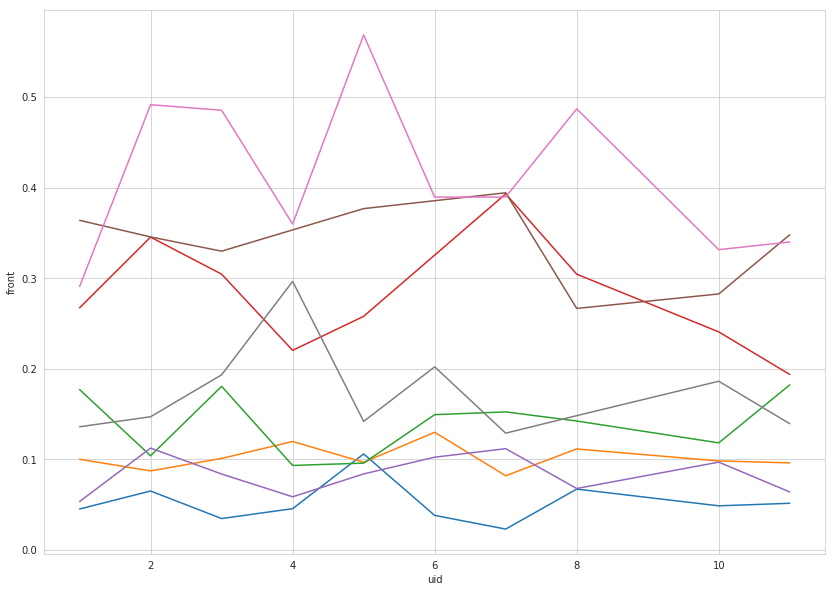

In [14]:
groups = tmp[(tmp['day']==5) ].groupby(by=['exc_num'])
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))
for index, group in groups:
#     print(group)
    
    ax = sns.lineplot(x='uid', y="front", data=group.reset_index(drop=False))
#     ax.set_title('exc_num is'+str(index))

### 1.1.1 use standart deviation to estimate slope of cumulative probability curve

In [15]:
sd_by_day = uid_avg_score_per_item.reset_index()[['day', 'exc_num', 'front']].groupby(by=['day', 'exc_num']).std()
sd_by_day

front
day exc_num          
1   1.2      0.040093
    1.3      0.058816
    1.4      0.034562
    1.5      0.029313
2   1.2      0.020084
    1.3      0.036182
    1.5      0.030953
    2.1      0.053142
    2.2      0.027125
    2.3      0.072496
3   2.1      0.033153
    2.2      0.048088
    2.3      0.095078
    3.1      0.092105
    3.2      0.075410
4   3.1      0.020412
    3.2      0.032558
    4.1      0.055217
    4.2      0.069160
    4.3      0.053346
5   1.5      0.022973
    2.1      0.014473
    2.2      0.034911
    2.3      0.062737
    3.2      0.021918
    4.1      0.044320
    4.2      0.089448
    4.3      0.050984

### 1.1.2 in above list we can observe the stardard deviation mostly decrese by day 

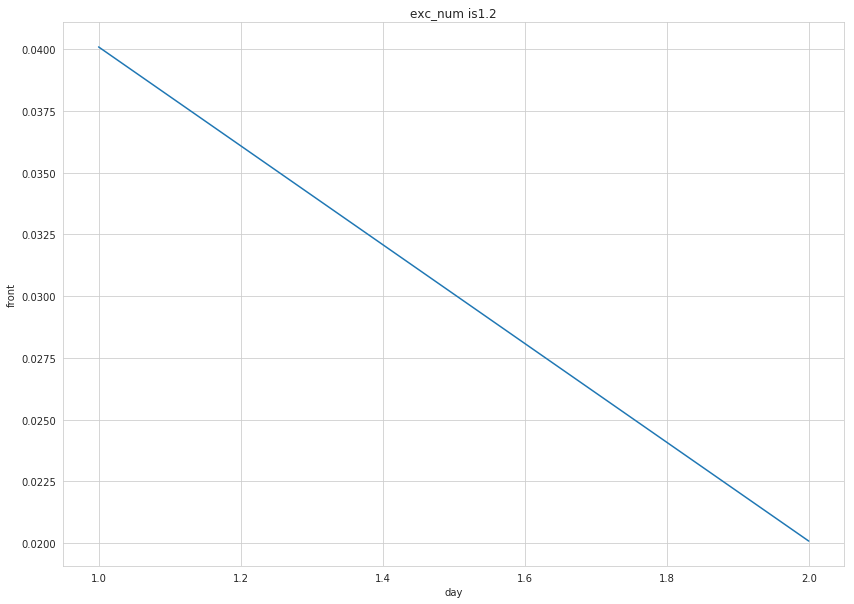

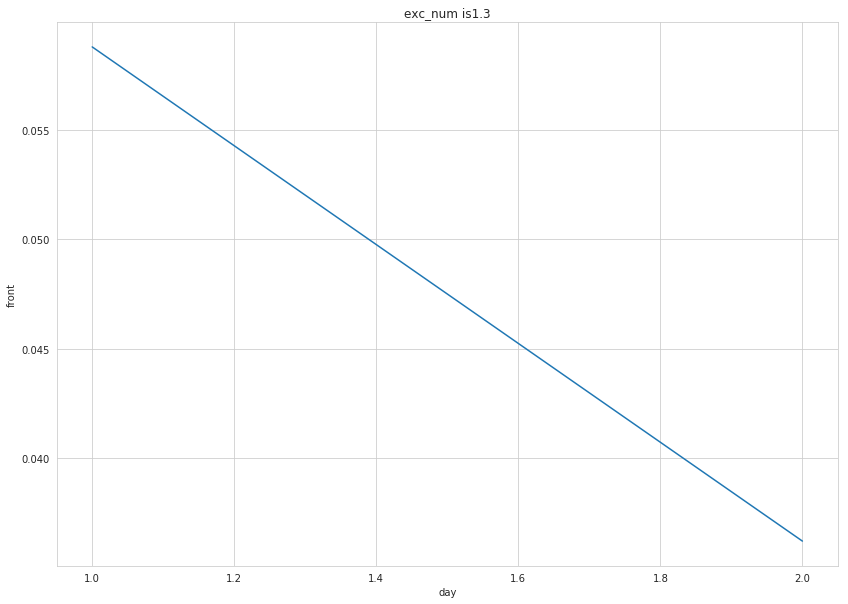

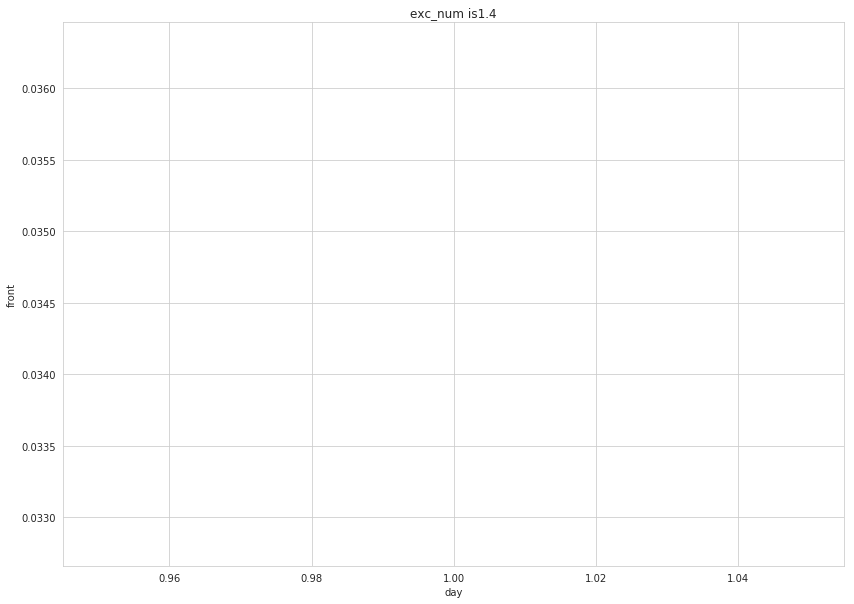

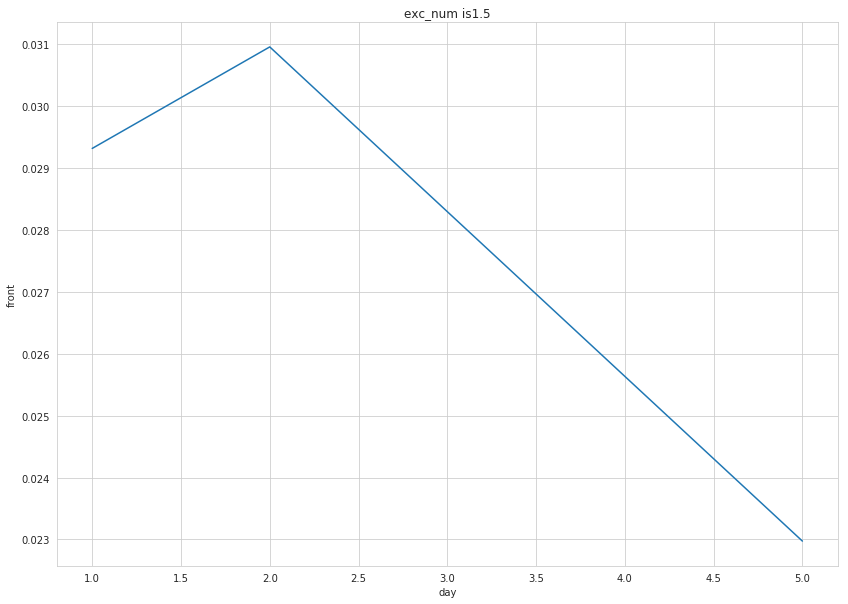

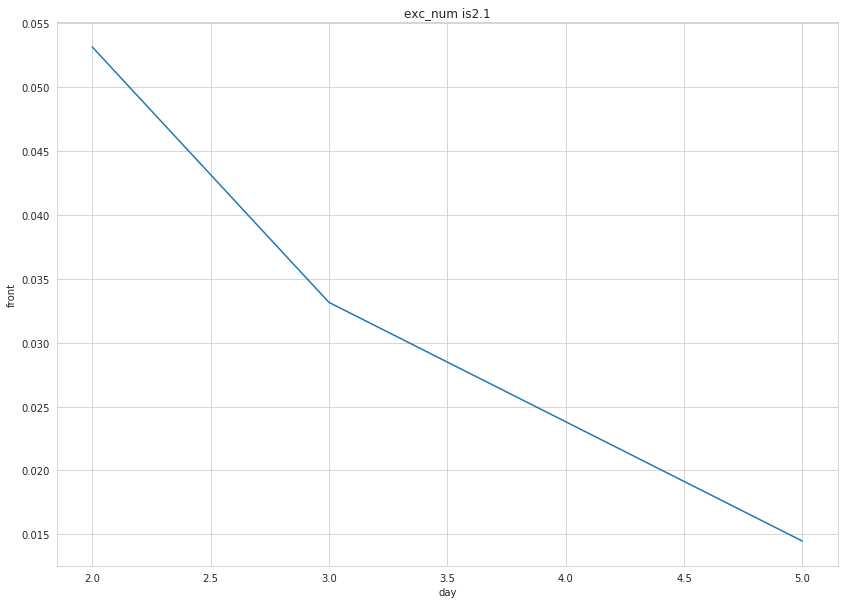

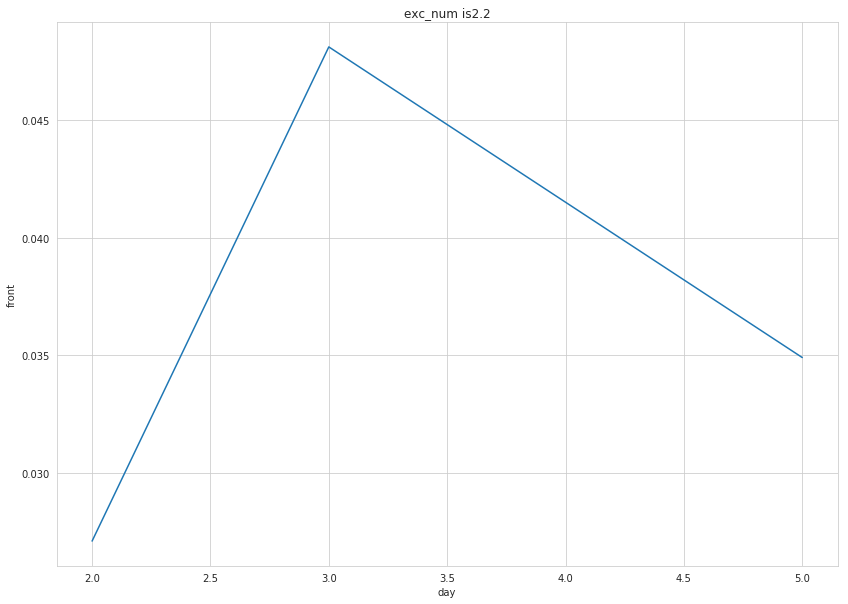

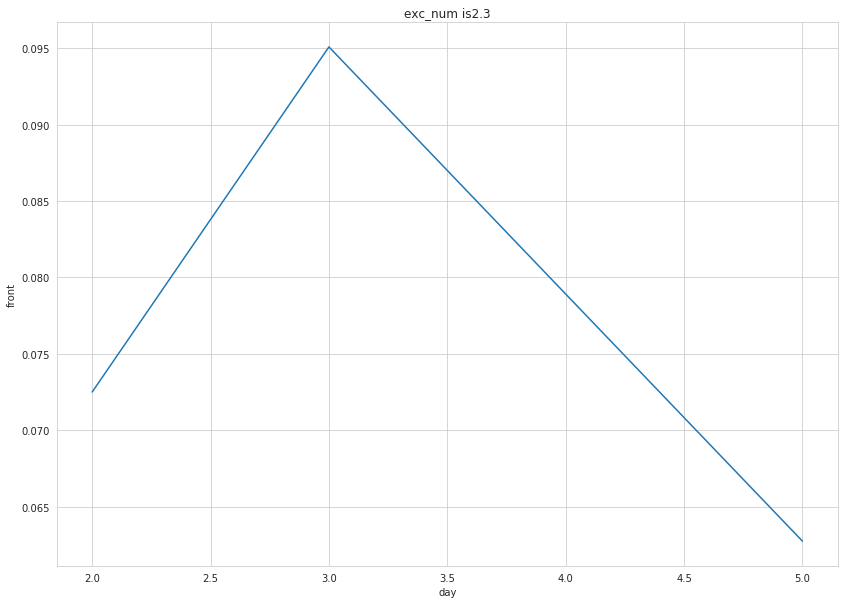

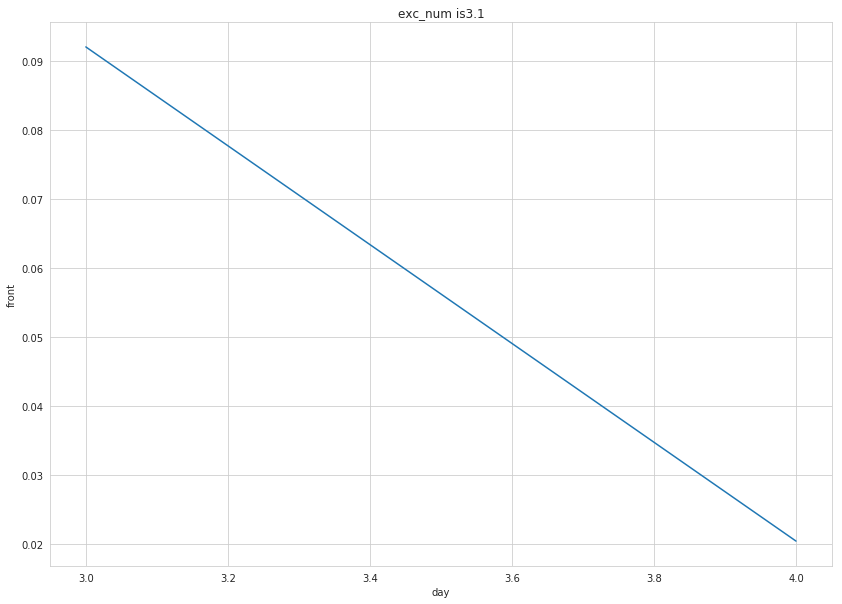

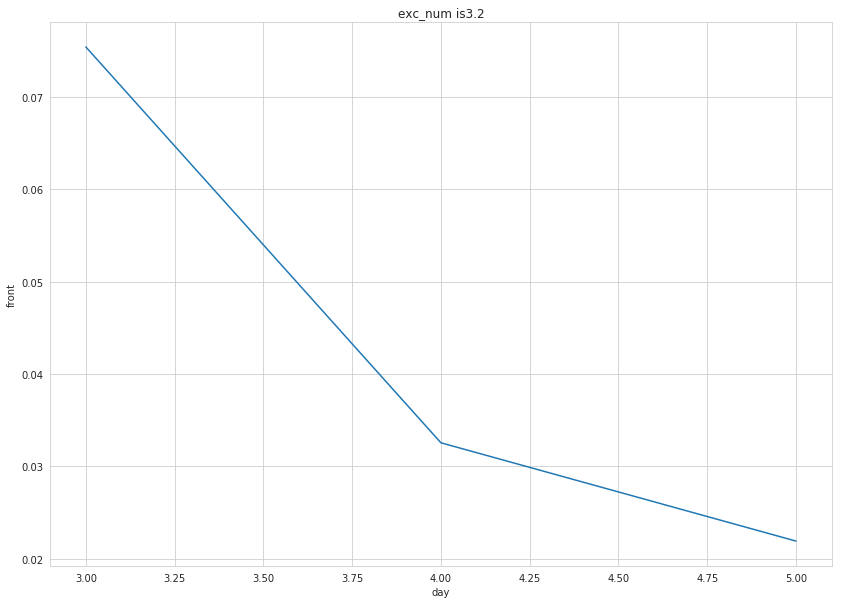

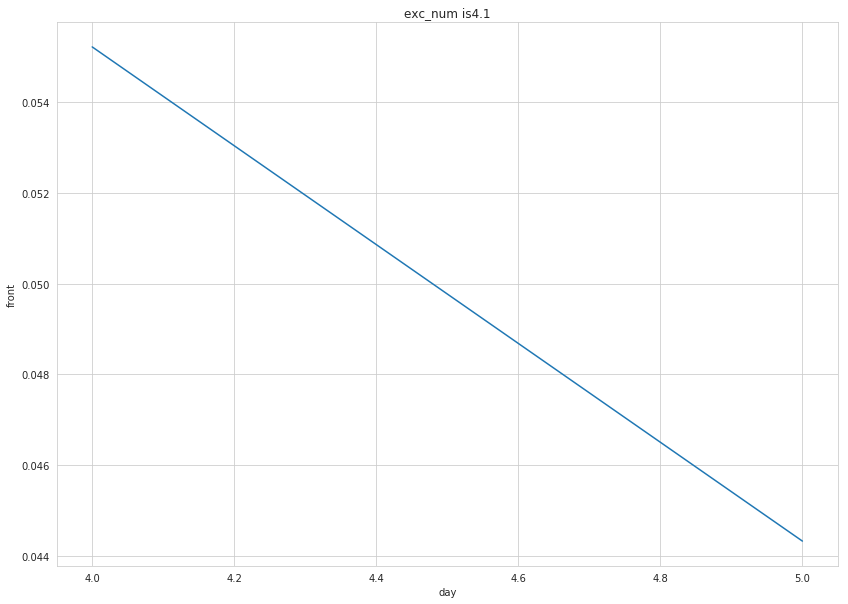

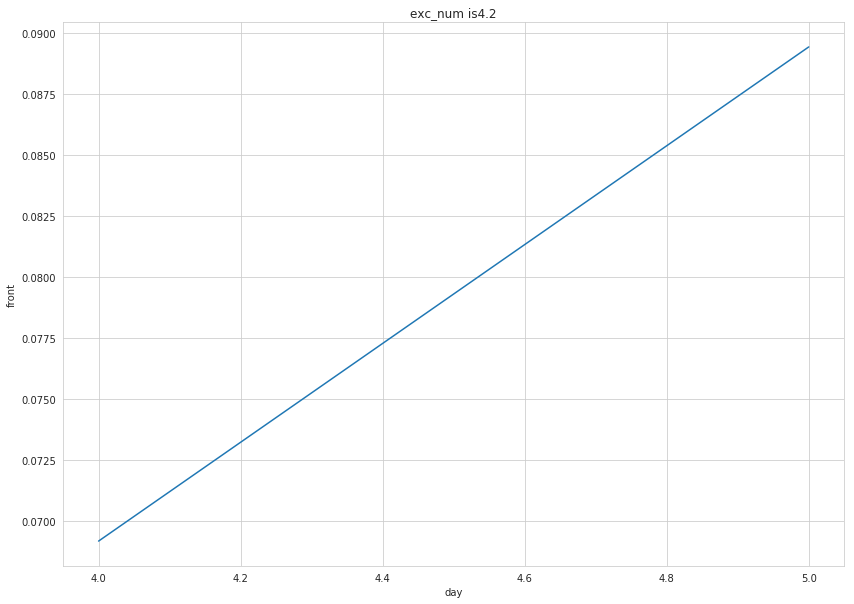

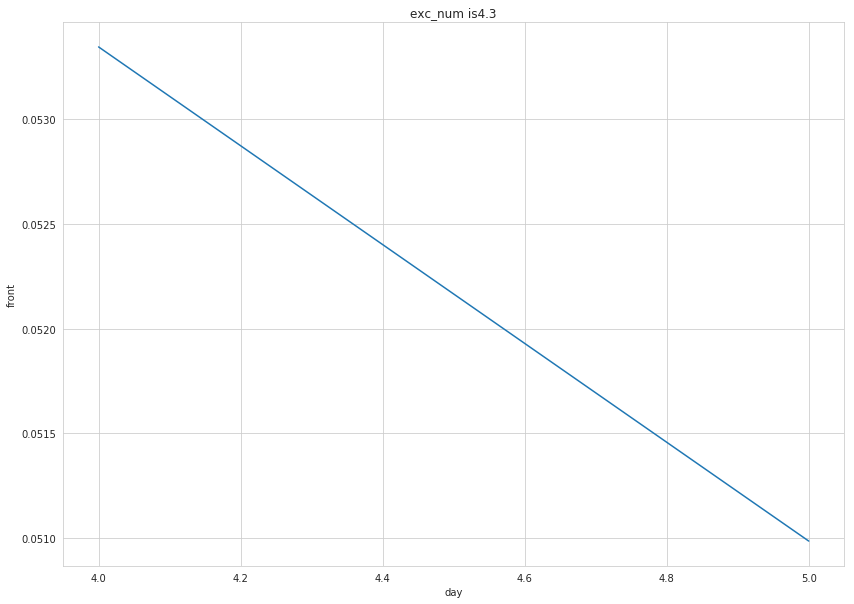

In [16]:
change_of_sd = sd_by_day.reset_index().groupby(by=['exc_num'])
for index, group in change_of_sd:
    sns.set_style('whitegrid')
    f, ax= plt.subplots(figsize = (14, 10))
    ax = sns.lineplot(x='day', y="front", data=group)
    ax.set_title('exc_num is'+str(index))

### 1.2.1 use average value to estimate difficulty 

###  